In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('welddb/welddb_cleaned.csv')

In [3]:
df.describe()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Type of weld_GMAA,Type of weld_GTAA,Type of weld_MMA,Type of weld_NGGMA,Type of weld_NGSAW,Type of weld_SA,Type of weld_SAA,Type of weld_ShMA,Type of weld_TSA,Puissance (W)
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,...,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1404.000000
mean,0.075521,0.328577,1.202821,0.009529,0.012952,0.175108,0.997214,0.230014,0.054702,0.060236,...,0.002421,0.002421,0.690073,0.004237,0.010896,0.157990,0.002421,0.024213,0.052663,9406.115741
std,0.023898,0.112455,0.382137,0.011213,0.019567,0.550553,2.333634,0.408261,0.372480,0.207828,...,0.049162,0.049162,0.462603,0.064976,0.103845,0.364842,0.049162,0.153757,0.223428,11061.573675
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2645.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3570.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.000000,0.000000,0.000000,0.000400,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3570.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.030000,0.402500,0.270000,0.010000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8410.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,5.000000,1.630000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47100.000000


In [5]:
df.columns 

Index(['Carbon concentration (weight%)', 'Silicon concentration (weight%)',
       'Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)',
       'Chromium concentration (weight%)',
       'Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
       'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)',
       'Oxygen concentration (ppm)', 'Titanium concentration (ppm)',
       'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)',
       'Boron concentration (ppm)', 'Niobium concentration (ppm)',
       'Tin concentration (ppm)', 'Arsenic concentration (ppm)',
       'Antimony concentration (ppm)', 'Heat input (kJmm-1)',
       'Interpass temperature (deg C)',
       'Post weld heat treatment temperature (deg C)',
       'Post weld heat treatment time (hours)', 'Yield strength (MPa)',
       'Ultimate tensi

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values[missing_values > 0]

Post weld heat treatment temperature (deg C)      13
Post weld heat treatment time (hours)             13
Yield strength (MPa)                             872
Ultimate tensile strength (MPa)                  914
Elongation (%)                                   952
Reduction of Area (%)                            947
Charpy temperature (deg C)                       773
Charpy impact toughness (J)                      773
Hardness (kgmm-2)                               1514
50 % FATT                                       1621
Primary ferrite in microstructure (%)           1554
Ferrite with second phase (%)                   1562
Acicular ferrite (%)                            1562
Martensite (%)                                  1563
Ferrite with carbide aggregate (%)              1563
Puissance (W)                                    248
dtype: int64

The dataset has some missing values in several columns, particularly in the target variables related to mechanical properties such as Yield strength (MPa), and Hardness (kg/mm²). Here are some key points regarding missing values:

Post weld heat treatment columns have a small number of missing values.

Puissance (W) has 248 missing values.

The targets : Yield strength (MPa), Ultimate tensile strength (MPa), Elongation (%),Reduction of Area (%), Charpy temperature (deg C), Charpy impact toughness (J)       have less than 50% null value

The targets : Hardness (kgmm-2), 50 % FATT, Primary ferrite in microstructure (%), Ferrite with second phase (%), Acicular ferrite (%), Martensite (%), Ferrite with carbide aggregate (%)    have more than 90% missing values

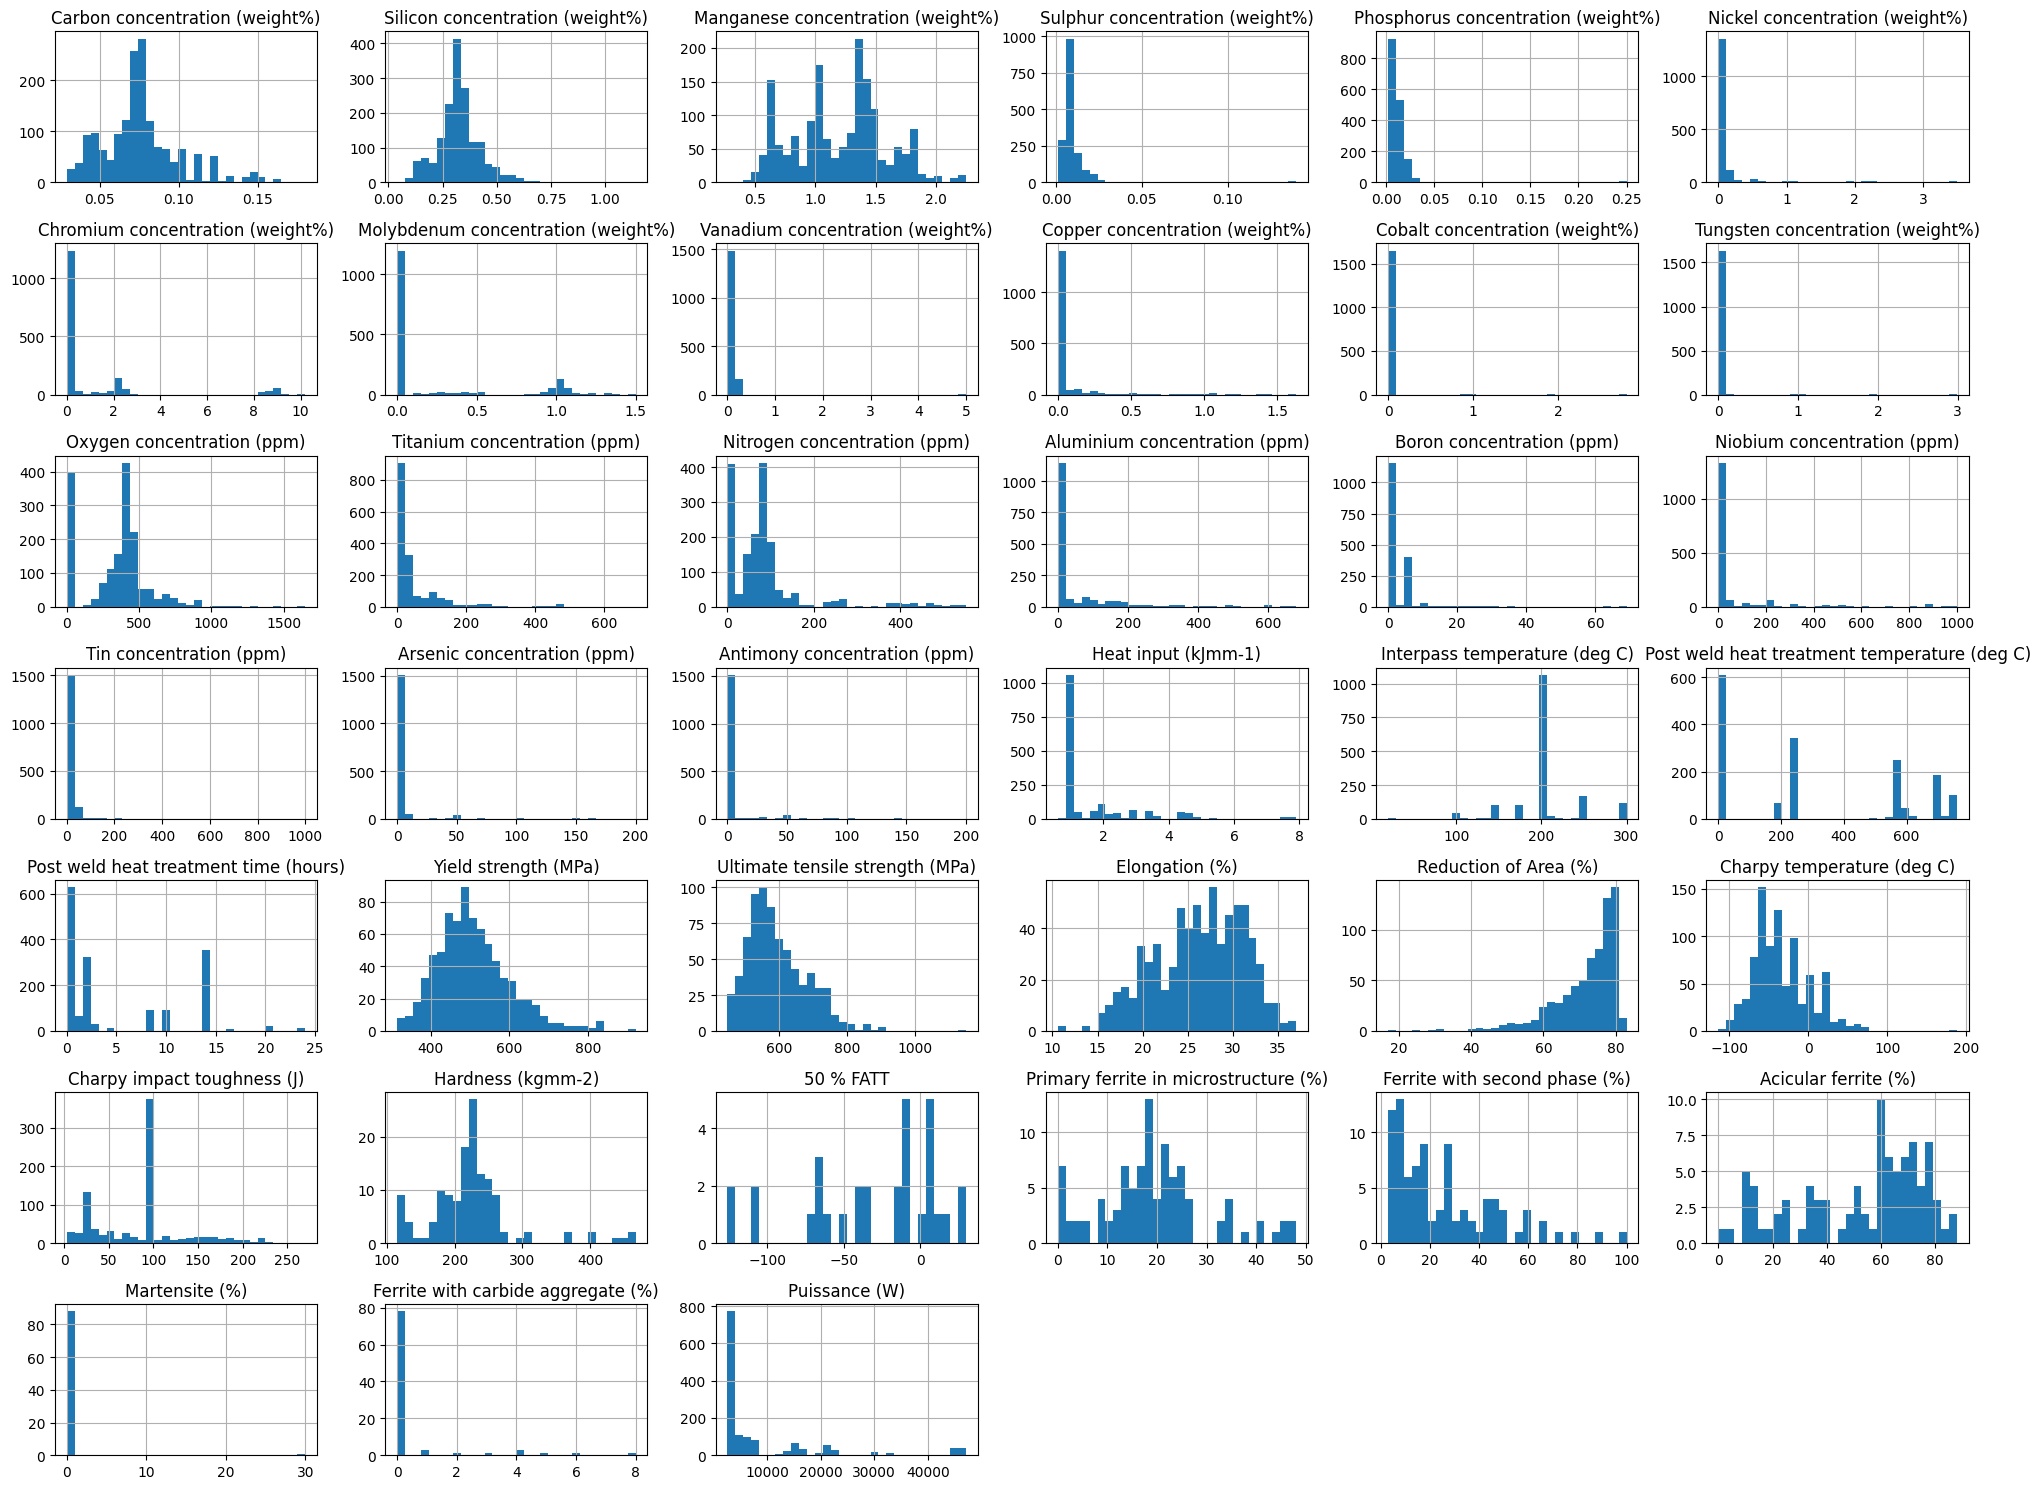

In [6]:
import matplotlib.pyplot as plt

# Select continuous variables for visualization
continuous_columns = [
    'Carbon concentration (weight%)', 'Silicon concentration (weight%)',
       'Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)',
       'Chromium concentration (weight%)',
       'Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
       'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)',
       'Oxygen concentration (ppm)', 'Titanium concentration (ppm)',
       'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)',
       'Boron concentration (ppm)', 'Niobium concentration (ppm)',
       'Tin concentration (ppm)', 'Arsenic concentration (ppm)',
       'Antimony concentration (ppm)', 'Heat input (kJmm-1)',
       'Interpass temperature (deg C)',
       'Post weld heat treatment temperature (deg C)',
       'Post weld heat treatment time (hours)', 'Yield strength (MPa)',
       'Ultimate tensile strength (MPa)', 'Elongation (%)',
       'Reduction of Area (%)', 'Charpy temperature (deg C)',
       'Charpy impact toughness (J)', 'Hardness (kgmm-2)', '50 % FATT',
       'Primary ferrite in microstructure (%)',
       'Ferrite with second phase (%)', 'Acicular ferrite (%)',
       'Martensite (%)', 'Ferrite with carbide aggregate (%)',
       'Puissance (W)'
]

# Plot histograms for continuous features
df[continuous_columns].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()


Some concentrations are in weight% and some in ppm, we need to normalize them

ppm (parts per million) = weight% * 1000


In [7]:
# Columns in ppm to be converted to weight %
ppm_columns = [
    'Oxygen concentration (ppm)', 'Titanium concentration (ppm)', 
    'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)', 
    'Boron concentration (ppm)', 'Niobium concentration (ppm)', 
    'Tin concentration (ppm)', 'Arsenic concentration (ppm)', 
    'Antimony concentration (ppm)'
]

# Convert ppm to weight %
df[ppm_columns] = df[ppm_columns] / 10000


In [8]:
# change the column names to remove the units
df.columns = df.columns.str.replace('ppm', 'weight%')

In [11]:
# Calculate the correlation matrix including binary variables
correlation_matrix_full = df.corr()



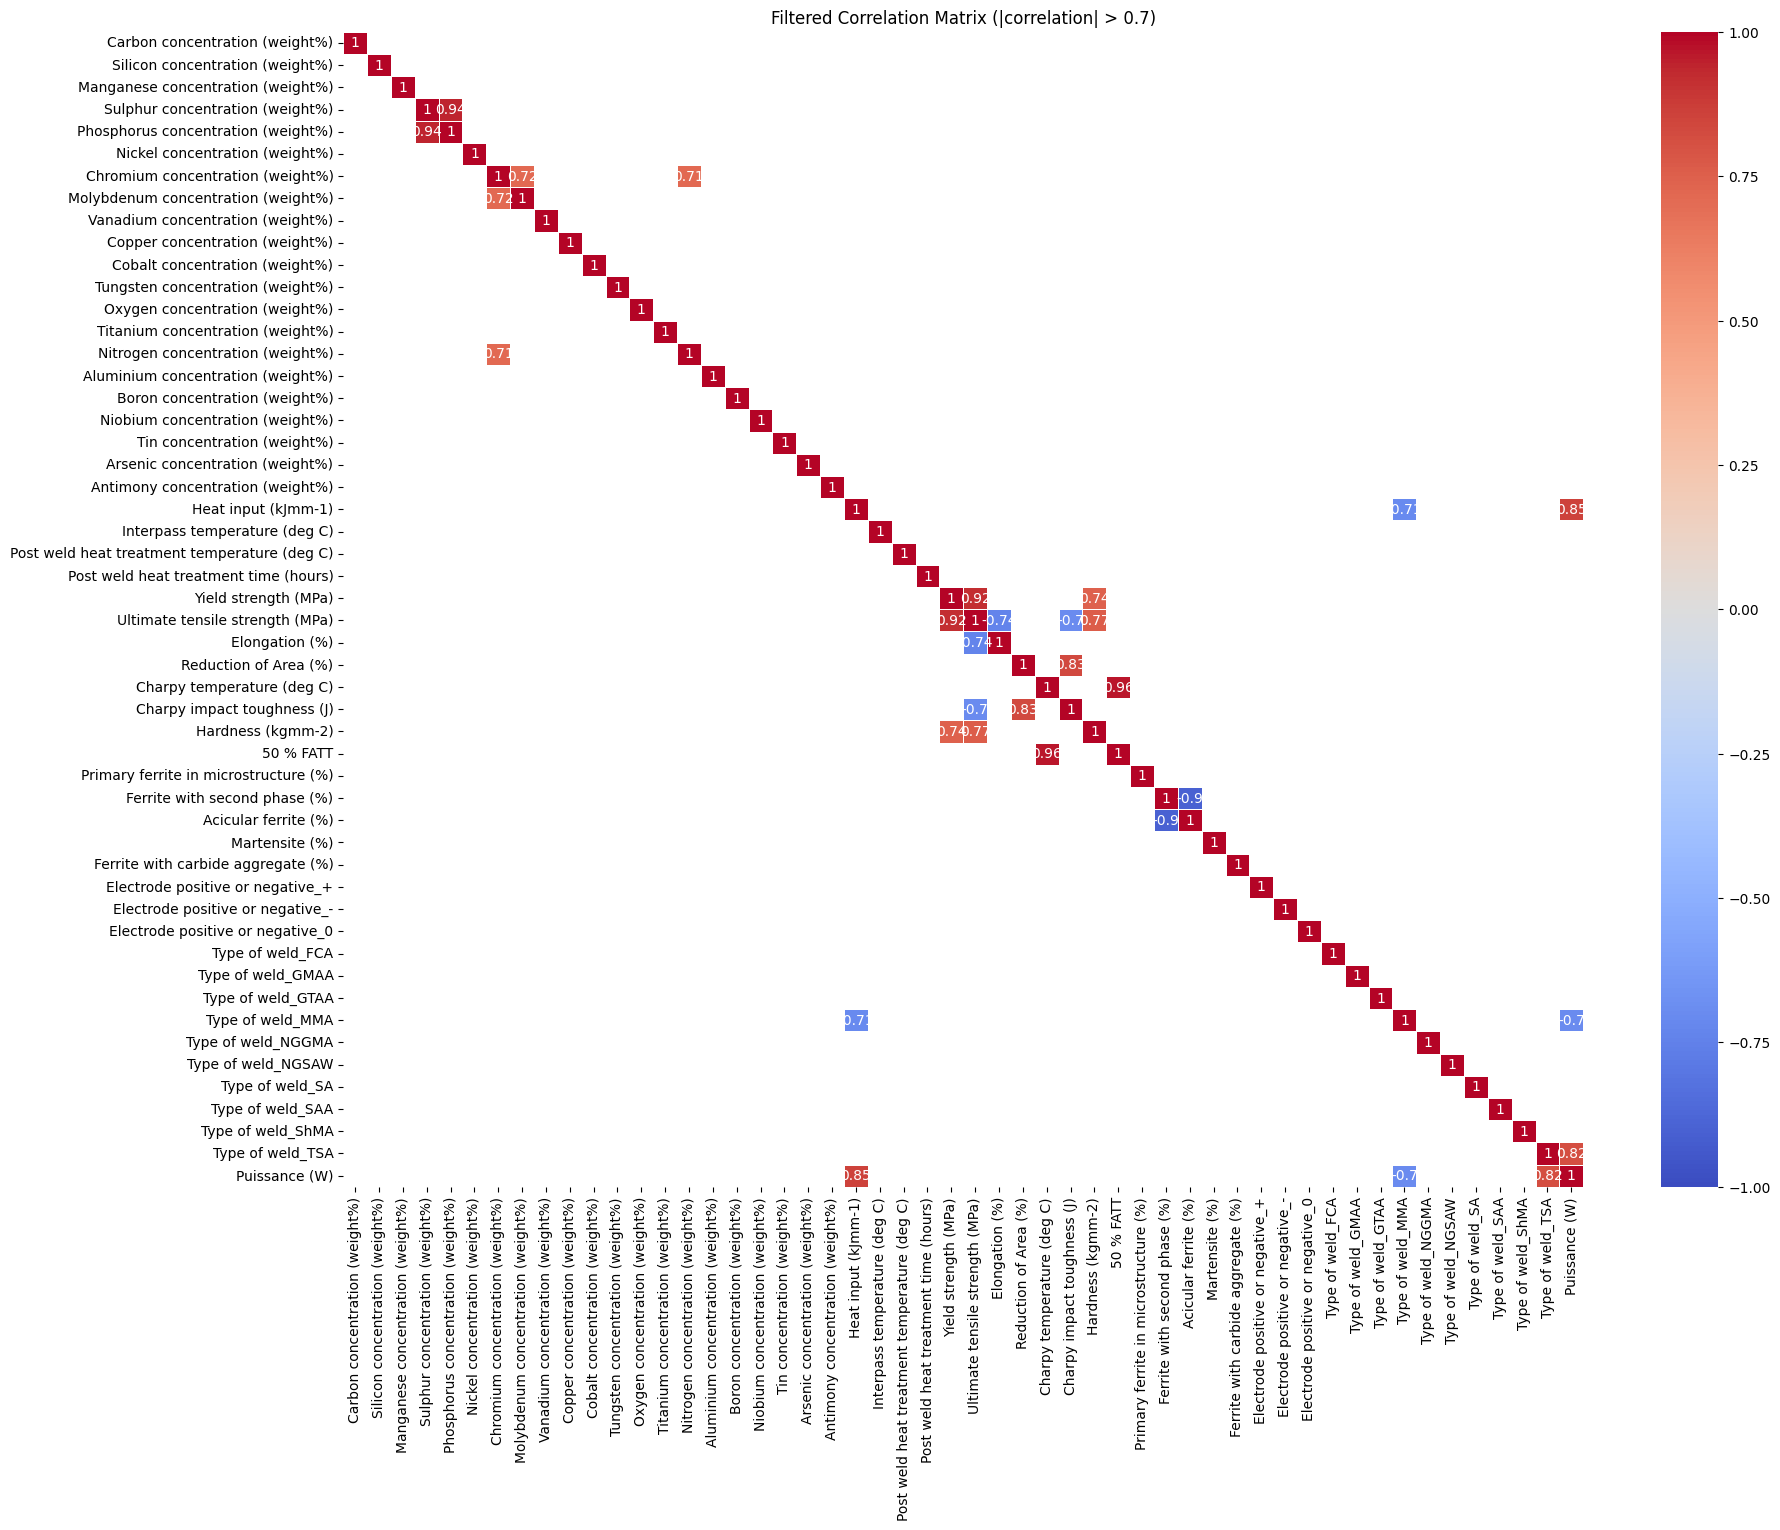

In [18]:
# Set the threshold for displaying correlations (0.5 or 0.7)
threshold = 0.7
# Filter the correlation matrix to show only values above the threshold (absolute value)
filtered_corr_matrix = correlation_matrix_full[(correlation_matrix_full.abs() >= threshold)]

# Plot the filtered correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title(f"Filtered Correlation Matrix (|correlation| > {threshold})")
plt.show()



Sulphur and Phosphorus concentrations have a very high positive correlation (0.94).

Heat input and Puissance (W) are highly correlated (0.85), as well as Type of weld_TSA (0.82).

Type of weld_MMA is negatively correlated with Puissance (W) (-0.70).

Since we will work on different type of models, it's better for the moment to not drop any column eventough some of the features are highly correlated. We will see the PCA results in order to train some simple models

In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean = 0, variance = 1) for PCA
scaler = StandardScaler()

# Standardize the continuous feature columns
continuous_feature_columns = [
    'Carbon concentration (weight%)', 'Silicon concentration (weight%)', 
    'Manganese concentration (weight%)', 'Sulphur concentration (weight%)', 
    'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)', 
    'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)', 
    'Vanadium concentration (weight%)', 'Copper concentration (weight%)', 
    'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)', 
    'Oxygen concentration (weight%)', 'Titanium concentration (weight%)', 
    'Nitrogen concentration (weight%)', 'Aluminium concentration (weight%)', 
    'Boron concentration (weight%)', 'Niobium concentration (weight%)', 
    'Tin concentration (weight%)', 'Arsenic concentration (weight%)', 
    'Antimony concentration (weight%)', 'Heat input (kJmm-1)', 
    'Interpass temperature (deg C)',
    'Post weld heat treatment temperature (deg C)',
    'Post weld heat treatment time (hours)',
    'Puissance (W)']
df[continuous_feature_columns]= scaler.fit_transform(df[continuous_feature_columns])


In [17]:
df.shape

(1652, 52)

In [15]:
# save the cleaned data

df.to_csv('welddb/welddb_cleaned_for_pca.csv', index=False)